<a href="https://colab.research.google.com/github/BriDeWaltCCC/FinalProjectDemo/blob/main/Final_Project_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker

In [3]:
#Import parks data from my GitHub repository via csv file
parksdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/FinalProjectDemo/main/parks.csv')

#Import and select relevant columns for species data
speciesdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/FinalProjectDemo/main/species.csv')
speciesdf=speciesdf.drop(['Seasonality','Nativeness','Record Status','Occurrence'], axis = 1)

#Add latitude and longitude bins to sort data
latbins = [15,20,25,30,35,40,45,50,55,60,65,70]
longbins = [-160,-155,-150,-145,-140,-135,-125,-120,-115,-110,-105,-100,-95,-90,-85,-80,-75,-70,-65]
parksdf['Lat Bins'] = pd.cut(parksdf.Latitude, latbins)
parksdf['Long Bins'] = pd.cut(parksdf.Longitude, longbins)

#Create combined dataframe for select analyses
biodf = pd.merge(parksdf,speciesdf)

<ipython-input-3-e7a807833fc3>:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  speciesdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/FinalProjectDemo/main/species.csv')


In [ ]:
#
#
#
# Geographic Analysis of NPs
#
#
#

In [ ]:
#For the NPs per State Graph
#Sort the data by state
parksdf_split = parksdf.sort_values('State')
parksdf_split = parksdf.drop(['Lat Bins', 'Long Bins'], axis = 1)
#Entries for YELL, GRSM, and DEVA listed multiple states on the same row
#Created an individual row for each state the NP was in
parksdf_split.loc[56] = ['YELL', 'Yellow Stone NP', 'WY', 2219791, 44.60, -110.50,]
parksdf_split.loc[57] = ['YELL', 'Yellow Stone NP', 'ID', 2219791, 44.60, -110.50]
parksdf_split.loc[58] = ['GRSM', 'Great Smoky NP', 'TN', 2219791, 44.60, -110.50]
parksdf_split.loc[59] = ['GRSM', 'Great Smoky NP', 'NC', 2219791, 44.60, -110.50]
parksdf_split.loc[60] = ['DEVA',	'Death Valley NP',	'CA', 4740912, 36.24, -116.82,]
parksdf_split.loc[61] = ['DEVA',	'Death Valley NP',	'NV', 4740912, 36.24, -116.82]
#Removed the original rows with multiple states listed
parksdf_dropped = parksdf_split.drop([53,24,15])
#Sorted by State
parksdf_sorted = parksdf_dropped.sort_values('State')
#The following null entry was added to solve the bin alignment problem 
#where the upper boundary of the histogram was exclusive and skewing the ticks
parksdf_sorted.loc[62] = ['.',	'.',	'', 0, 0, 0]

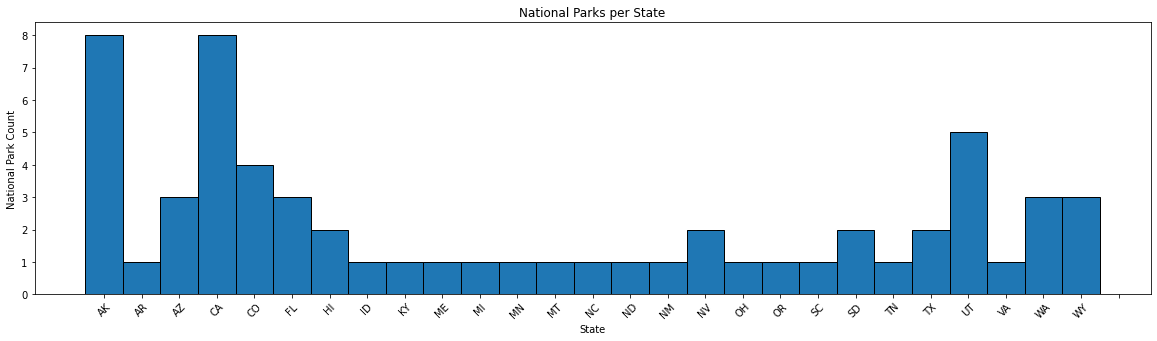

In [ ]:
#NPs per State graph is a histogram of the number of entries listed per state in the parksdf_sorted data
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(parksdf_sorted['State'], bins = (len(pd.unique(parksdf['State']))), align = 'left', edgecolor = 'black')
ax.tick_params(axis='x',labelrotation =45)
ax.set_title('National Parks per State')
plt.xlabel('State')
plt.ylabel('National Park Count')
plt.show()

This graph shows us that the states of Alaska and California have the most National Parks (8), while Utah has the second most (5).

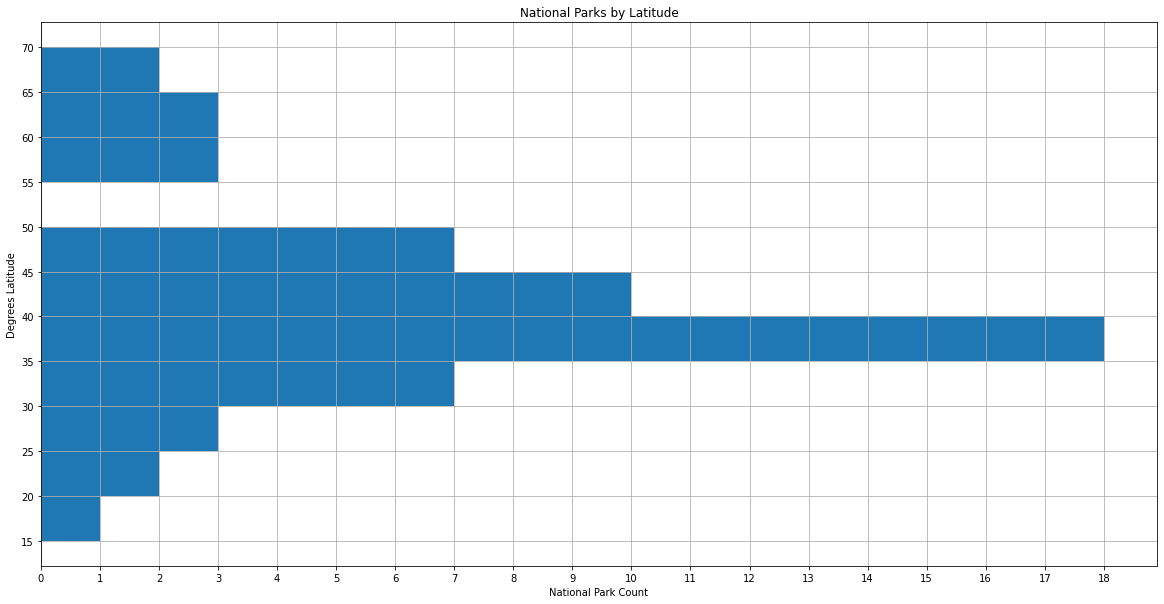

In [ ]:
#NPs by Latitude graph
#This graph was oriented horizontal to better represent latitude
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(parksdf['Latitude'], 11, range=[15, 70], orientation='horizontal')
#The following locator code places ticks at specific intervals
xloc = plticker.MultipleLocator(base=1) 
yloc = plticker.MultipleLocator(base=5) 
ax.xaxis.set_major_locator(xloc)
ax.yaxis.set_major_locator(yloc)
ax.set_title('National Parks by Latitude')
plt.xlabel('National Park Count')
plt.ylabel('Degrees Latitude')
plt.grid()
plt.show()

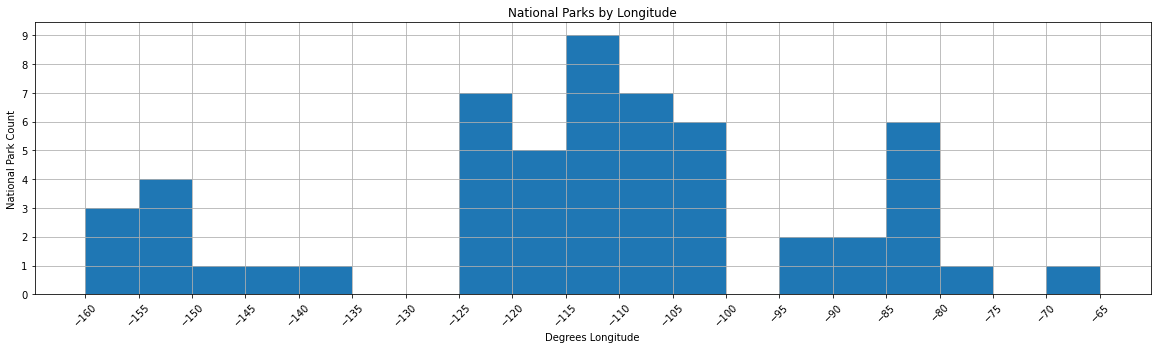

In [ ]:
#NPs by Longitude graph
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(parksdf['Longitude'], 19, range = [-160,-65])
#The following locator code places ticks at specific intervals
locx = plticker.MultipleLocator(base=5)
locy = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(locx)
ax.yaxis.set_major_locator(locy)
ax.tick_params(axis='x',labelrotation=45)
ax.set_title('National Parks by Longitude')
plt.xlabel('Degrees Longitude')
plt.ylabel('National Park Count')
plt.grid()
plt.show()

In [ ]:
#
#
#
# Biodiversity Analyses
#
#
#

Text(0, 0.5, 'Species Count')

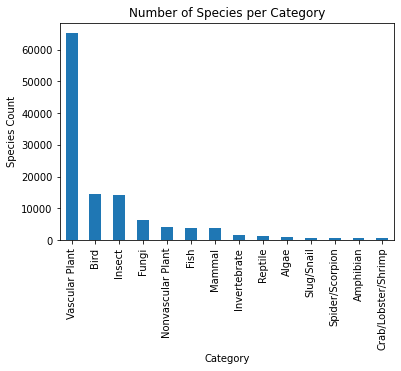

In [ ]:
#Number of Species per Category
speciesdf['Category'].value_counts().plot(kind='bar', title='Number of Species per Category')
plt.xlabel('Category')
plt.ylabel('Species Count')

Text(0, 0.5, 'Species Count')

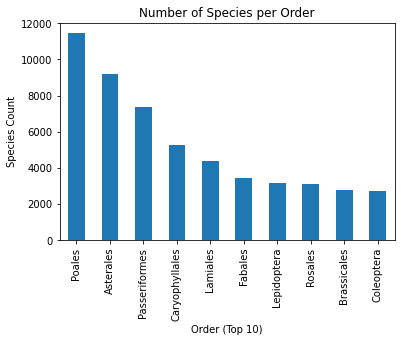

In [ ]:
#Number of species per Order
speciesdf['Order'].value_counts().nlargest(10).plot(kind='bar', title = 'Number of Species per Order')
plt.xlabel('Order (Top 10)')
plt.ylabel('Species Count')

Text(0, 0.5, 'Species Count')

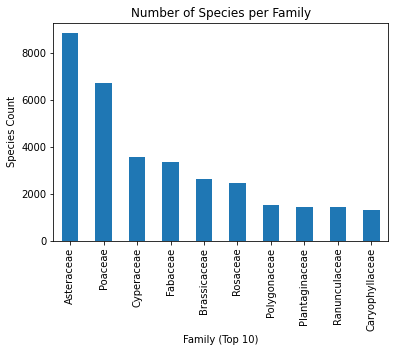

In [ ]:
#Number of Species per Family
speciesdf['Family'].value_counts().nlargest(10).plot(kind='bar', title = 'Number of Species per Family')
plt.xlabel('Family (Top 10)')
plt.ylabel('Species Count')

Text(0, 0.5, 'Count')

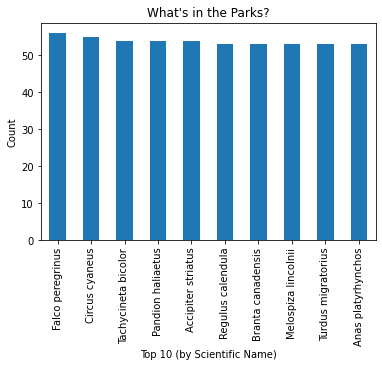

In [ ]:
#Top 10 species by Scientific Name
speciesdf['Scientific Name'].value_counts().nlargest(10).plot(kind='bar', title = "What's in the Parks?")
plt.xlabel('Top 10 (by Scientific Name)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

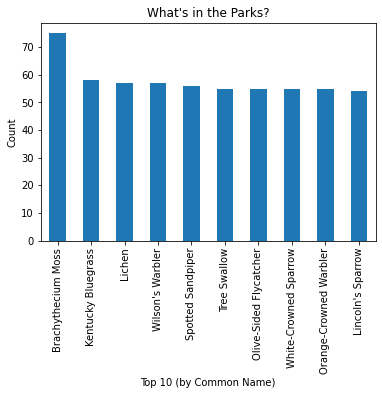

In [ ]:
#Top 10 species by Common Name
speciesdf.drop(speciesdf.loc[speciesdf['Common Names']=='None'].index, inplace=True)
speciesdf['Common Names'].value_counts().nlargest(10).plot(kind='bar', title = "What's in the Parks?")
plt.xlabel('Top 10 (by Common Name)')
plt.ylabel('Count')

Interestly this differs from the results for **Top 10 (by Scientific Name)**. Upon further inspection that is because there are some instances where multiple species share a common name, meaning there can be multiple entries for the same common name in a park.

In [ ]:
#
#
#
# Species by Geographic Area
#
#
#

Text(0, 0.5, 'Species Count')

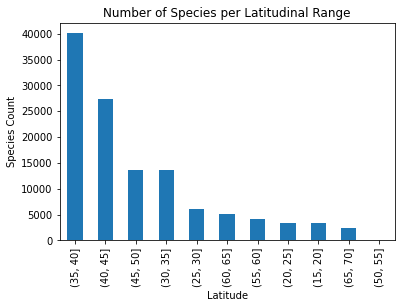

In [ ]:
#Number of species by latitude
biodf['Lat Bins'].value_counts().plot(kind='bar', title='Number of Species per Latitudinal Range')
plt.xlabel('Latitude')
plt.ylabel('Species Count')

Text(0, 0.5, 'Species Count')

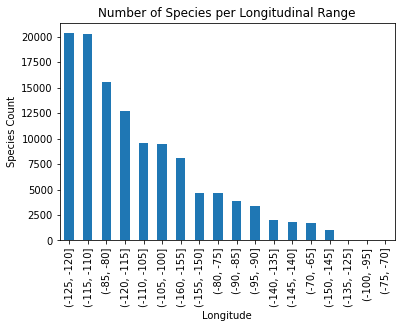

In [ ]:
#Number of species by longitude
biodf['Long Bins'].value_counts().plot(kind='bar', title='Number of Species per Longitudinal Range')
plt.xlabel('Longitude')
plt.ylabel('Species Count')

Text(0, 0.5, 'Species Count')

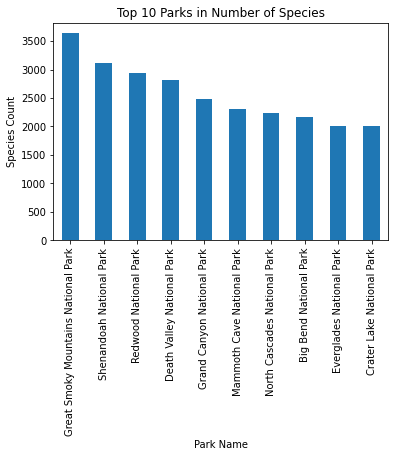

In [ ]:
#Species per park (most)
speciesdf['Park Name'].value_counts().nlargest(10).plot(kind='bar', title = 'Top 10 Parks in Number of Species')
plt.xlabel('Park Name')
plt.ylabel('Species Count')

Text(0, 0.5, 'Species Count')

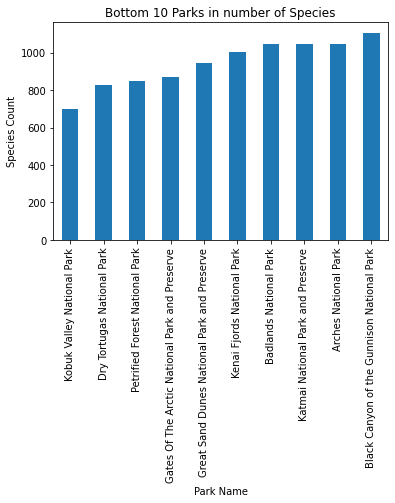

In [ ]:
#Species per park (least)
speciesdf['Park Name'].value_counts().nsmallest(10).plot(kind='bar', title = 'Bottom 10 Parks in number of Species')
plt.xlabel('Park Name')
plt.ylabel('Species Count')